In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import pandas as pd
import ipykernel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

# Regression lineaire

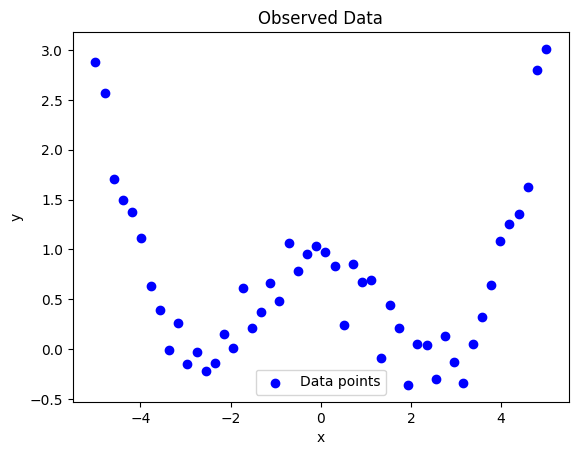

In [5]:
"""1."""
data = pd.read_csv('Regression.dat', sep=' ')
x = data['x']
y = data['yobs']
N = len(x)

plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Observed Data')
plt.legend()
plt.show()

In [6]:
"""2."""
def loss(w):
    """Fonction de perte des moindres carrés"""
    return np.sum((w[0] + w[1]*x - y)**2)

In [7]:
"""3."""
initial_weights = [0, 0]
result = opt.minimize(loss, initial_weights)
w1, w2 = result.x

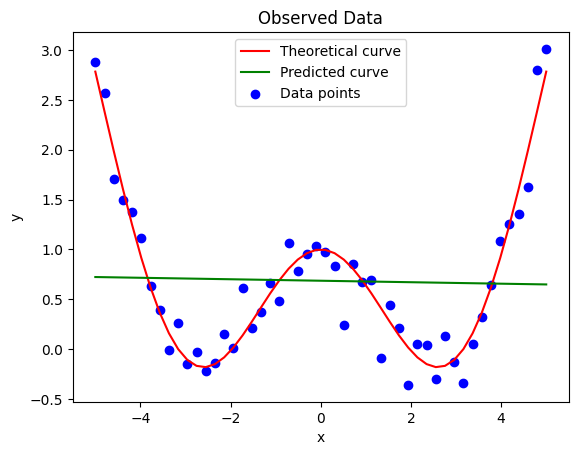

In [8]:
"""4."""
X = np.linspace(-5, 5, 50)
y_th = np.cos(X) + 0.1*X**2
y_pred = w1 + w2*X

plt.plot(X, y_th, label='Theoretical curve', color='red')
plt.plot(X, y_pred, label='Predicted curve', color='green')
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Observed Data')
plt.legend()
plt.show()

In [9]:
"""5. La courbe predite ne correspond pas aux donnees observees => relation entre x et y est non lineaire."""

'5. La courbe predite ne correspond pas aux donnees observees => relation entre x et y est non lineaire.'

# 2. Regression non lineaire

In [10]:
data = pd.read_csv('Regression.dat', sep=' ')
x = data['x']
y = data['yobs']
N = len(x)

In [11]:
"""1."""
def sigmoid(x):
    """Activation function: Sigmoid"""
    return 1 / (1 + np.exp(-x))

def model(w):
    """Neural network model with 2 neurons in the hidden layer using sigmoid activation"""
    z = np.zeros(N)
    for i in range(N):
        z[i] = w[4] + w[5] * sigmoid(w[0] + w[1] * x[i]) + w[6] * sigmoid(w[2] + w[3] * x[i])
    return z

In [12]:
"""2."""
def loss(w):
    """Mean Squared Error loss function"""
    ymod = model(w)
    return np.sum((ymod - y) ** 2)

/tmp/ipykernel_37989/3654315299.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_37989/3654315299.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


min(loss) = 22.112042793190128


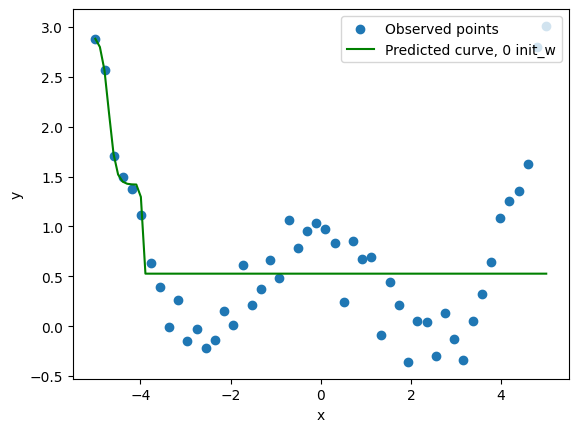

In [13]:

"""3."""
initial_weights = [0] * 7
result = opt.minimize(loss, initial_weights)

optimized_weights = result.x
print("min(loss) =", result.fun)

def predictions(x):
    return optimized_weights[4] + optimized_weights[5] * sigmoid(optimized_weights[0] + optimized_weights[1] * x) + optimized_weights[6] * sigmoid(optimized_weights[2] + optimized_weights[3] * x)

X  = np.linspace(-5, 5, 100)
ypre1_1 = [predictions(x) for x in X]

plt.figure()
plt.scatter(x, y, label="Observed points")
plt.plot(X, ypre1_1, label="Predicted curve, 0 init_w", color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()

min(loss) = 7.0948287807992845


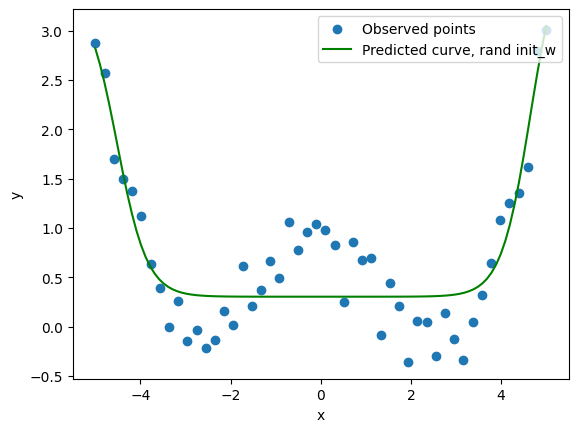

In [14]:
"""4."""
initial_weights = [np.random.normal() for _ in range(7)]
result = opt.minimize(loss, initial_weights)

optimized_weights = result.x
print("min(loss) =", result.fun)

ypre1_2 = [predictions(x) for x in X]

plt.figure()
plt.scatter(x, y, label="Observed points")
plt.plot(X, ypre1_2, label="Predicted curve, rand init_w", color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()

min(loss) = 22.101070388875034
min(loss) = 2.031341218083878


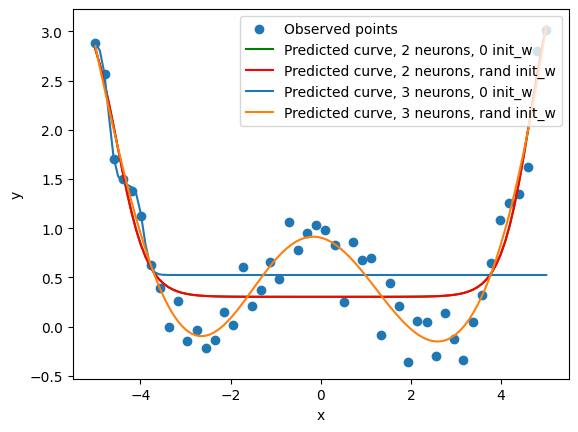

In [15]:
"""5."""
def model2(w):
    """Neural network model with 3 neurons in the hidden layer using sigmoid activation"""
    z = np.zeros(N)
    for i in range(N):
        z[i] = w[6] + w[7] * sigmoid(w[0] + w[1] * x[i]) + w[8] * sigmoid(w[2] + w[3] * x[i]) + w[9] * sigmoid(w[4] + w[5] * x[i])
    return z


def loss2(w):
    """Mean Squared Error loss function for model2"""
    ymod = model2(w)
    return np.sum((ymod - y) ** 2)

initial_weights2 = [0] * 10
result2 = opt.minimize(loss2, initial_weights2)

optimized_weights2 = result2.x
print("min(loss) =", result2.fun)

def predictions2(x):
    return optimized_weights2[6] + optimized_weights2[7] * sigmoid(optimized_weights2[0] + optimized_weights2[1] * x) + optimized_weights2[8] * sigmoid(optimized_weights2[2] + optimized_weights2[3] * x) + optimized_weights2[9] * sigmoid(optimized_weights2[4] + optimized_weights2[5] * x)

ypre2_1 = [predictions2(x) for x in X]

# plt.figure()
# plt.scatter(x, y, label="Observed points")
# plt.plot(X, ypre2_1, label="Predicted curve with 3 neurons, 0 init_w", color='g')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend(loc='upper right')
# plt.show()

initial_weights2 = [np.random.normal() for _ in range(10)]
result2 = opt.minimize(loss2, initial_weights2)
optimized_weights2 = result2.x
print("min(loss) =", result2.fun)

ypre2_2 = [predictions2(x) for x in X]

# plt.figure()
# plt.scatter(x, y, label="Observed points")
# plt.plot(X, ypre2_2, label="Predicted curve with 3 neurons, rand init_w", color='g')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend(loc='upper right')
# plt.show()

plt.figure()
plt.scatter(x, y, label="Observed points")
plt.plot(X, ypre1_2, label="Predicted curve, 2 neurons, 0 init_w", color='g')
plt.plot(X, ypre1_2, label="Predicted curve, 2 neurons, rand init_w", color='r')
plt.plot(X, ypre2_1, label="Predicted curve, 3 neurons, 0 init_w")
plt.plot(X, ypre2_2, label="Predicted curve, 3 neurons, rand init_w")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()

# Classification : perceptron

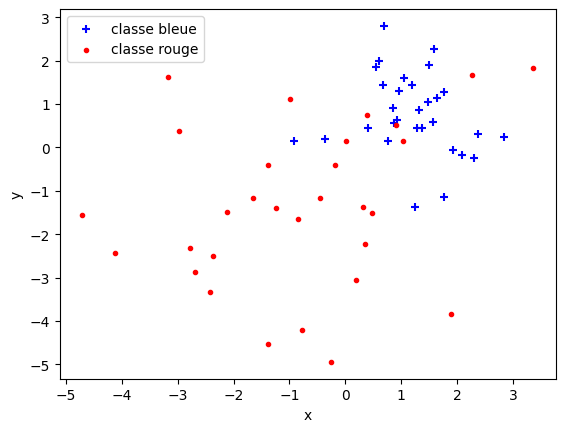

In [16]:
"""1."""
data = pd.read_csv('Classification.dat', sep=' ')
X = data[['x1', 'x2']].values
y = data['y'].values
N = len(X)

plt.figure()
plt.scatter(X[:30, 0], X[:30, 1], marker='+', color='b', label='classe bleue')
plt.scatter(X[30:, 0], X[30:, 1], marker='.', color='r', label='classe rouge')
plt.xlabel('x'), plt.ylabel('y')
plt.legend()
plt.show()

In [17]:
"""2."""
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def model(w: list) -> list:
    return sigmoid(w[0] + w[1]*X[:, 0] + w[2]*X[:, 1])

In [18]:
"""3."""
def loss(w: list) -> float:
    """fonction loss cross-entropy"""
    ymod = model(w)
    yi = np.where(y == 2, 1, 0)
    return -np.sum(yi * np.log(ymod) + (1 - yi) * np.log(1 - ymod))

min(loss) = 22.964438288958682


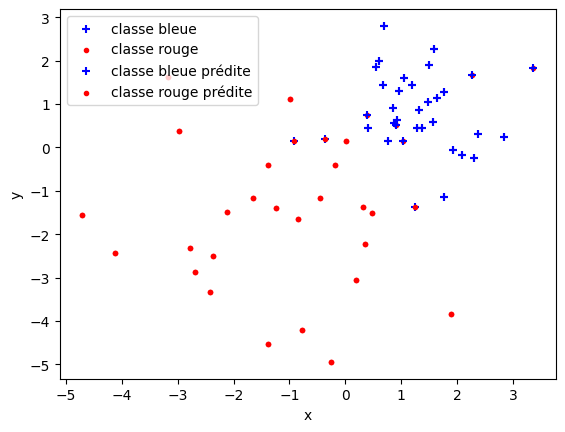

In [19]:
"""4."""
initial_weights = np.random.normal(size=3)
min_loss = opt.minimize(loss, initial_weights)
weights = min_loss.x

print("min(loss) =", min_loss.fun)
predictions = model(weights)
ypre = np.where(predictions < 0.5, 1, 2)
B = X[ypre == 1]
R = X[ypre == 2]

plt.figure()
plt.scatter(X[:30, 0], X[:30, 1], marker='+', color='b', label='classe bleue')
plt.scatter(X[30:, 0], X[30:, 1], marker='.', color='r', label='classe rouge')
plt.scatter(B[:, 0], B[:, 1], marker='+', color='b', label='classe bleue prédite')
plt.scatter(R[:, 0], R[:, 1], marker='.', color='r',label='classe rouge prédite')
plt.xlabel('x'), plt.ylabel('y')
plt.legend()
plt.show()

In [20]:
"""5."""
labels = [1, 2]

ct = pd.crosstab(pd.Series(y, name="True"), pd.Series(ypre, name="Predicted"))
ct = ct.reindex(index=labels, columns=labels, fill_value=0)

print("\nConfusion matrix:")
print(ct)

tp = ct.loc[1, 1] + ct.loc[2, 2]
accuracy = tp / N
print(f"\nAccuracy : {accuracy * 100:.2f}%")


Confusion matrix:
Predicted   1   2
True             
1          27   3
2           5  25

Accuracy : 86.67%


# Classification : Regression logistique

In [21]:
"""1."""
Data = pd.read_csv('Classification.dat', sep=' ')
X = Data[['x1','x2']].to_numpy()
y = Data['y'].tolist()
N = len(X)

def sigmoid(x) :
    return 1/(1+np.exp(-x))

def softmax(z) :
    return np.array([np.exp(z[i])/np.sum(np.exp(z)) for i in range(len(z))])

In [22]:
"""2."""
Y = np.zeros((N, 2))
for i in range(len(y)) :
    Y[i,y[i]-1] = 1


In [23]:
"""3."""
def model(w) :
    z1 = np.zeros(N, dtype='float128')
    z2 = np.zeros(N, dtype='float128')
    for i in range(N) :
        z1[i] = w[6] + w[7]*sigmoid(w[0] + w[1]*X[i,0] + w[2]*X[i,1]) + w[8]*sigmoid(w[3] + w[4]*X[i,0] + w[5]*X[i,1])
        z2[i] = w[9] + w[10]*sigmoid(w[0] + w[1]*X[i,0] + w[2]*X[i,1]) + w[11]*sigmoid(w[3] + w[4]*X[i,0] + w[5]*X[i,1])
    z = np.array([softmax([z1[i],z2[i]]) for i in range(N)])
    return z

In [24]:
"""4."""
def loss(w) :
    z = model(w)
    eps =  1e-15
    return -np.mean(np.sum(Y * np.log(z + eps), axis=1))

In [25]:
"""5."""
initial_weights = np.random.normal(size=12)
min_loss = opt.minimize(loss, initial_weights)
optimized_weights = min_loss.x

print("min(loss)", min_loss.fun)

/tmp/ipykernel_37989/4230378038.py:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


min(loss) 0.27033674116066284143


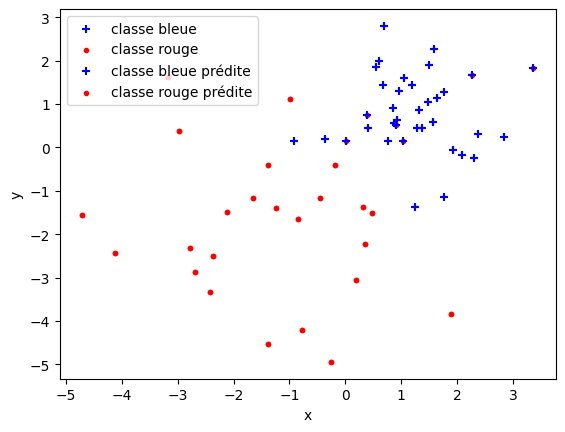

In [26]:
"""6."""
predictions = model(optimized_weights)
ypre = np.argmax(predictions, axis=1) + 1
B = X[ypre == 1]
R = X[ypre == 2]

plt.figure()
plt.scatter(X[:30, 0], X[:30, 1], marker='+', color='b', label='classe bleue')
plt.scatter(X[30:, 0], X[30:, 1], marker='.', color='r', label='classe rouge')
plt.scatter(B[:, 0], B[:, 1], marker='+', color='b', label='classe bleue prédite')
plt.scatter(R[:, 0], R[:, 1], marker='.', color='r',label='classe rouge prédite')
plt.xlabel('x'), plt.ylabel('y')
plt.legend()
plt.show()

In [27]:
"""7."""

y_true = np.argmax(Y, axis=1) + 1
y_pred = np.argmax(predictions, axis=1) + 1

ct = pd.crosstab(pd.Series(y_true, name="Vrai"),
                 pd.Series(ypre, name="Prédit"))
ct = ct.reindex(index=[1,2], columns=[1,2], fill_value=0)
print(ct)

accuracy = (ypre == np.array(y)).mean()
print(f"Accuracy : {accuracy:.2%}")

Prédit   1   2
Vrai          
1       30   0
2        6  24
Accuracy : 90.00%


# Classification Iris

In [28]:
"""1."""
data = pd.read_csv('iris.dat', sep=' ')
X = data[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].to_numpy()
Y = data['Species'].to_numpy()
N = len(X)

In [29]:
"""2"""
#Exercice sur feuille

'2'

In [30]:
"""3"""
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

species = np.unique(Y)
train_list = []
test_list = []

for label, subset in data.groupby('Species'):
    half = len(subset) // 2
    train_list.append(subset.iloc[:half])
    test_list.append(subset.iloc[half:])

train = pd.concat(train_list).sample(frac=1, random_state=42).reset_index(drop=True)
test = pd.concat(test_list).sample(frac=1, random_state=42).reset_index(drop=True)

X_train = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].to_numpy()
Y_train = train['Species'].to_numpy()

X_test = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].to_numpy()
Y_test = test['Species'].to_numpy()

In [31]:
"""4"""
species = ['setosa', 'versicolor', 'virginica']
Y_train_ind = pd.get_dummies(pd.Categorical(Y_train, categories=species)).to_numpy()
Y_test_ind  = pd.get_dummies(pd.Categorical(Y_test,  categories=species)).to_numpy()

In [32]:
"""5"""
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

model = keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(4, activation="sigmoid"),
    layers.Dense(3, activation="softmax")
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

early = keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True, monitor="val_loss"
)

history = model.fit(
    X_train_s, Y_train_ind,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    callbacks=[early],
    verbose=1
)

loss, acc = model.evaluate(X_test_s, Y_test_ind, verbose=0)
print(f"\nTest accuracy: {acc:.2%} (loss={loss:.4f})")

Epoch 1/200


E0000 00:00:1761146571.510116   37989 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1761146571.529078   37989 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.2500 - loss: 1.2096 - val_accuracy: 0.4667 - val_loss: 1.0927
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3000 - loss: 1.1628 - val_accuracy: 0.4667 - val_loss: 1.0740
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3833 - loss: 1.1193 - val_accuracy: 0.4000 - val_loss: 1.0630
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4667 - loss: 1.0834 - val_accuracy: 0.4000 - val_loss: 1.0485
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5333 - loss: 1.0508 - val_accuracy: 0.3333 - val_loss: 1.0220
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5333 - loss: 1.0206 - val_accuracy: 0.5333 - val_loss: 0.9956
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5667 - loss: 0.9894 - val_accuracy: 0.6000 - val_loss: 0.9637
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6333 - loss: 0.9593 - val_accuracy: 0.6000 - val_loss: 0.9330
Epo

In [33]:
"""6"""
y_train_pred_prob = model.predict(X_train_s)
y_test_pred_prob  = model.predict(X_test_s)

y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred  = np.argmax(y_test_pred_prob, axis=1)

y_train_true = np.argmax(Y_train_ind, axis=1)
y_test_true  = np.argmax(Y_test_ind, axis=1)

print("\nMatrice de confusion — Entraînement :")
print(confusion_matrix(y_train_true, y_train_pred))

print("\nMatrice de confusion — Test :")
print(confusion_matrix(y_test_true, y_test_pred))

train_accuracy = np.mean(y_train_pred == y_train_true)
test_accuracy  = np.mean(y_test_pred == y_test_true)

print(f"\nAccuracy (train) : {train_accuracy:.2%}")
print(f"Accuracy (test) :  {test_accuracy:.2%}")

print(f"\nTaux d'erreur (train): {1 - train_accuracy:.2%}")
print(f"Taux d'erreur (test) :          {1 - test_accuracy:.2%}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Matrice de confusion — Entraînement :
[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]

Matrice de confusion — Test :
[[25  0  0]
 [ 0 21  4]
 [ 0  0 25]]

Accuracy (train) : 98.67%
Accuracy (test) :  94.67%

Taux d'erreur (train): 1.33%
Taux d'erreur (test) :          5.33%
